# Cat VS Dogs

# Intro

In this notebook, I will try to classify whether images contain either a dog or a cat, by using Ensemble Learning .<br>
The training archive contains 25,000 images of dogs and cats.<br>


# Loading Libraries

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.image import imread
#import seaborn as sns
#from sklearn.model_selection import train_test_split #to perform the splitting
import os
#import tensorflow as tf
import cv2# library of Python bindings designed to solve computer vision problems.

# <b>Loading dataset</b>

First of all, I opened the train folder and saw that the folder has pictures of both cats and dogs.<br>
Pictures of dogs are kept in the name: "dog.number", and pictures of cats are kept in the name: "cat.number".<br>
The following code will create a list of all the file names in the folder:

In [81]:
TRAIN_DIR = 'C:/Users/yuval/trainCatVSDogs/train/'
#TEST_DIR = '../working/test/test/'

trainCatsAndDogs_images_filepaths = [TRAIN_DIR + last_file_name for last_file_name in os.listdir(TRAIN_DIR)]
#trainDogs_images_filepaths = [TRAIN_DIR + last_file_name for last_file_name in os.listdir(TRAIN_DIR)]

#test_images_filepaths = [TEST_DIR + last_file_name for last_file_name in os.listdir(TEST_DIR)]

#print("Done")

In [82]:
trainCatsAndDogs_images_filepaths

['C:/Users/yuval/trainCatVSDogs/train/cat.0.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.100.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10002.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10003.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10004.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10005.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10006.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10007.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10008.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10009.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10010.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10011.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1

After I created a list of all the file names, I want to separate the files contains 'dog' in their name to one list, <br>
and the files contains 'cat' in their name to another list.

In [89]:
#Define two lists of dogs and cats, and check if the file name contain 'dog' or 'cat'
train_dogs_filepaths = [TRAIN_DIR+ dog_file_name for dog_file_name in os.listdir(TRAIN_DIR) if 'dog' in dog_file_name]
train_cats_filepaths = [TRAIN_DIR+ cat_file_name for cat_file_name in os.listdir(TRAIN_DIR) if 'cat' in cat_file_name]


In [84]:
train_cats_filepaths

['C:/Users/yuval/trainCatVSDogs/train/cat.0.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.100.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10002.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10003.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10004.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10005.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10006.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10007.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10008.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10009.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10010.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10011.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1

In [85]:
train_dogs_filepaths

['C:/Users/yuval/trainCatVSDogs/train/dog.0.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.100.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10002.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10003.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10004.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10005.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10006.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10007.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10008.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10009.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10010.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10011.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1

## Explain about method's parameters<b>

**cv2.imread(path, flag)**:<br>
    
method loads an image from the specified file and read it into a numpy array.<br> 
If the image cannot be read (because of missing file, improper permissions,unsupported or invalid format) then this method returns an empty matrix.<br> 
    
**path**-A string representing the path of the image to be read.<br>
**flag**-It specifies the way in which image should be read.<br>
    It’s default value is cv2.IMREAD_COLOR-to load a color image and cv2.IMREAD_GRAYSCALE to load grey scale image. <br>
    
**plt.imshow(img_array)**:<br>
    
method is used to display an image in a window. The window automatically fits to the image size.<br>
    
**img_array**-array of pixels (as we got from last method).
    

In [100]:
#Lets see how the first picture of dog look like 
test_img_file_path =train_dogs_filepaths[0] #the first element in train_dogs_filepaths array
#Now I will use cv2.imread() method- to loads an image from the specified file. 
img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
img_array #Lets see how the numpu array of the image look like



array([[[124, 113, 115],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [141, 131, 131],
        [139, 131, 131],
        [139, 131, 131]],

       [[125, 114, 116],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [143, 133, 133],
        [141, 133, 133],
        [141, 133, 133]],

       [[126, 115, 117],
        [128, 117, 119],
        [131, 118, 120],
        ...,
        [145, 135, 135],
        [143, 135, 135],
        [143, 135, 135]],

       ...,

       [[ 77,  73,  68],
        [ 81,  77,  72],
        [ 83,  79,  74],
        ...,
        [ 85,  83,  73],
        [ 84,  82,  72],
        [ 83,  81,  71]],

       [[ 75,  71,  66],
        [ 77,  73,  68],
        [ 77,  73,  68],
        ...,
        [ 77,  75,  65],
        [ 77,  75,  65],
        [ 78,  76,  66]],

       [[ 74,  70,  65],
        [ 75,  71,  66],
        [ 74,  70,  65],
        ...,
        [ 76,  74,  64],
        [ 76,  74,  64],
        [ 76,  74,  64]]

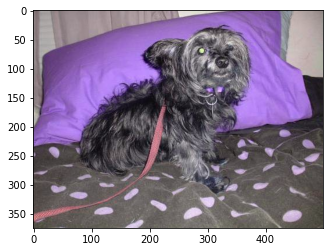

In [101]:
plt.imshow(img_array)#show the image
plt.show() 

In [102]:
#We can see the dimension of the image 
print(img_array.shape)

(375, 499, 3)


According to numpy documentation, the resulting array we got from .shape method will always have this order:(height, width, depth)- means that is 3 dimensional array.<br>
For example, referring to the example above- the image is 499 pixel wide, and 375 pixel high.<br>
Each pixel contains 3 bytes (representing the red, green and blue values of the pixel colour).<br>
As we learned during current semester, one way to dimensionality reduction is to change the image to grayscale image.<br>
Lets show it:
   

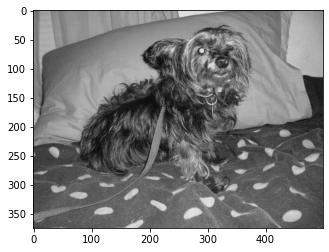

In [105]:
img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array_gray, cmap = "gray")
plt.show()


In [106]:
#Lets see the dimension of the image
print(img_array_gray.shape)

(375, 499)


In [10]:
#Creating a list Pointing towards each image

import os
def ListofFiles(Dir):
    Files = []
    for root, dir_name, file_name in os.walk(Dir): 
#root store address till directory, dir_name stores directory name # file_name stores file name
        for name in file_name:
            fullName = os.path.join(root, name)
            Files.append(fullName)
    return Files

In [15]:
#Reading each image

FileList = ListofFiles('C:/Users/yuval/trainCatVSDogs')

from PIL import Image

pixels=[]

for file in FileList:
    Im = Image.open(file)
    pixels.append(list(Im.getdata()))

In [16]:
#Writing the pixels to CSV

from numpy import savetxt

pixels_arr=np.asarray(pixels)
print(pixels_arr.shape)
savetxt('numbers.csv', pixels_arr, delimiter=',')

(0,)
